In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole

In [4]:
import numpy as np
import matplotlib.pyplot as plt

array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

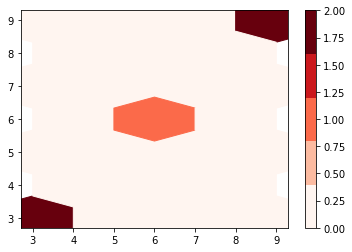

In [73]:
x = np.array([3, 3, 9, 9, 6])
y = np.array([3, 3, 9, 9, 6])
s_x = np.array([3, 6])
s_y = np.array([3, 6])
grid_size = (3, 3)

all_positions_hb = plt.hexbin(x, y, cmap=plt.cm.get_cmap('Reds', 5),
                              gridsize=grid_size, vmin=0, vmax=2);
plt.colorbar()

norm = all_positions_hb.get_array()
norm

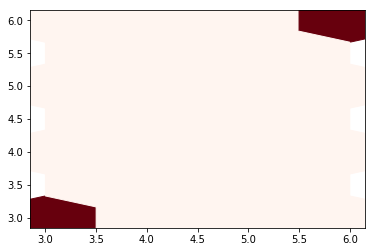

In [74]:
hb = plt.hexbin(s_x, s_y,
           cmap=plt.cm.get_cmap('Reds', 5), gridsize=grid_size, vmin=0, vmax=1)
count = hb.get_array()
centers = hb.get_offsets()

/Users/edeno/miniconda3/envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([ 0.5,  0.5,  0. ])

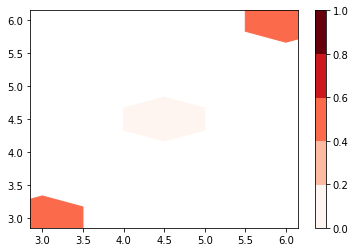

In [94]:
blah = plt.hexbin(centers[:, 0], centers[:, 1], C=count/norm,
           cmap=plt.cm.get_cmap('Reds', 5), gridsize=grid_size, vmin=0, vmax=1)
plt.colorbar()
blah.get_array()

In [131]:
def occupancy_normalized_hexbin(x, y, all_x, all_y, ax=None,
                                gridsize=(3, 3), **kwargs):
    '''Bins (x, y) into hexagonal grid and normalizes the
    count by the binned count of (all_x, all_y).
    
    Useful when measuring the frequency of events over time 
    and space when the time spent in each bin is not equal.
    
    Parameters
    ----------
    x : numpy.ndarray
        Grid position at event
    y : numpy.ndarray
        Grid position at event
    all_x : numpy.ndarray
        Grid position over all time. For normalization.
    all_y : numpy.ndarray
        Grid position over all time. For normalization.
    gridsize : array-like, shape (2,), optional
        Size of the grid.
    **kwargs : hexbin keyword arguments, optional
    
    Returns
    -------
    axis_handle : a `~matplotlib.collections.PolyCollection` instance
    
    '''
    if ax is None:
        ax = plt.gca()
    occupancy = ax.hexbin(all_x, all_y, gridsize=gridsize)
    plt.cla()
    occupancy_count = occupancy.get_array()
    hexbin_centers = occupancy.get_offsets()
    event_count = ax.hexbin(x, y, gridsize=gridsize).get_array()
    plt.cla()
    normalized_count = event_count / occupancy_count
    return ax.hexbin(centers[:, 0], centers[:, 1],
                     C=normalized_count, gridsize=gridsize, **kwargs)

/Users/edeno/miniconda3/envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in true_divide


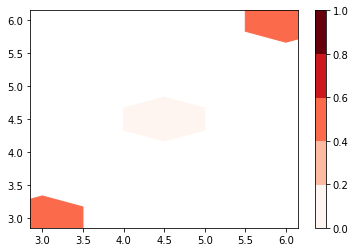

In [130]:
fig, ax = plt.subplots()
ax = occupancy_normalized_hexbin(s_x, s_y, x, y, gridsize=(3, 3),
                                 cmap=plt.cm.get_cmap('Reds', 5), vmin=0, vmax=1, ax=ax)
ax.get_array()
fig.colorbar(ax);